In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix


# 1. Load data
df = pd.read_csv('../dataset/stroke.csv')

# 2. Drop kolom 'id' jika ada
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [22]:
# Drop baris dengan smoking_status unknown
df = df[df['smoking_status'] != 'Unknown']

df = df[df['gender'] != 'Other']

df.dropna(subset=['bmi'], inplace=True)

label_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
# Model Deep Learning
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


c:\Users\lenovo\Downloads\capstone\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6762 - loss: 0.5736 - val_accuracy: 0.9380 - val_loss: 0.2445
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9491 - loss: 0.1981 - val_accuracy: 0.9380 - val_loss: 0.2111
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1670 - val_accuracy: 0.9380 - val_loss: 0.2020
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.1673 - val_accuracy: 0.9380 - val_loss: 0.2001
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.1419 - val_accuracy: 0.9380 - val_loss: 0.1973
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9527 - loss: 0.1547 - val_accuracy: 0.9380 - val_loss: 0.1974
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9516 - loss: 0.1505 - val_accuracy: 0.9380 - val_loss: 0.1975
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.1513 - val_accuracy: 0.9380 - val_loss: 0.1995
Epo

In [25]:
# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)

# Prediksi dan laporan
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
print(classification_report(y_test, y_pred_classes))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9399 - loss: 0.2001 
Akurasi: 0.9343065619468689
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       649
           1       0.09      0.03      0.04        36

    accuracy                           0.93       685
   macro avg       0.52      0.51      0.50       685
weighted avg       0.90      0.93      0.92       685



In [26]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50


c:\Users\lenovo\Downloads\capstone\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4463 - loss: 0.7603 - val_accuracy: 0.8996 - val_loss: 0.4688
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.3842 - val_accuracy: 0.9270 - val_loss: 0.3063
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9472 - loss: 0.2634 - val_accuracy: 0.9325 - val_loss: 0.2473
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9478 - loss: 0.2192 - val_accuracy: 0.9343 - val_loss: 0.2244
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.2313 - val_accuracy: 0.9343 - val_loss: 0.2145
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.1664 - val_accuracy: 0.9380 - val_loss: 0.2097
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1766 - val_accuracy: 0.9361 - val_loss: 0.2071
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9615 - loss: 0.1451 - val_accuracy: 0.9343 - val_loss: 0.2057
Epo

In [27]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       649
           1       0.09      0.03      0.04        36

    accuracy                           0.93       685
   macro avg       0.52      0.51      0.50       685
weighted avg       0.90      0.93      0.92       685



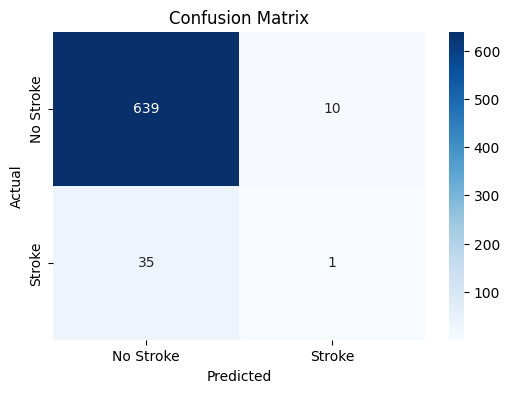

In [28]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

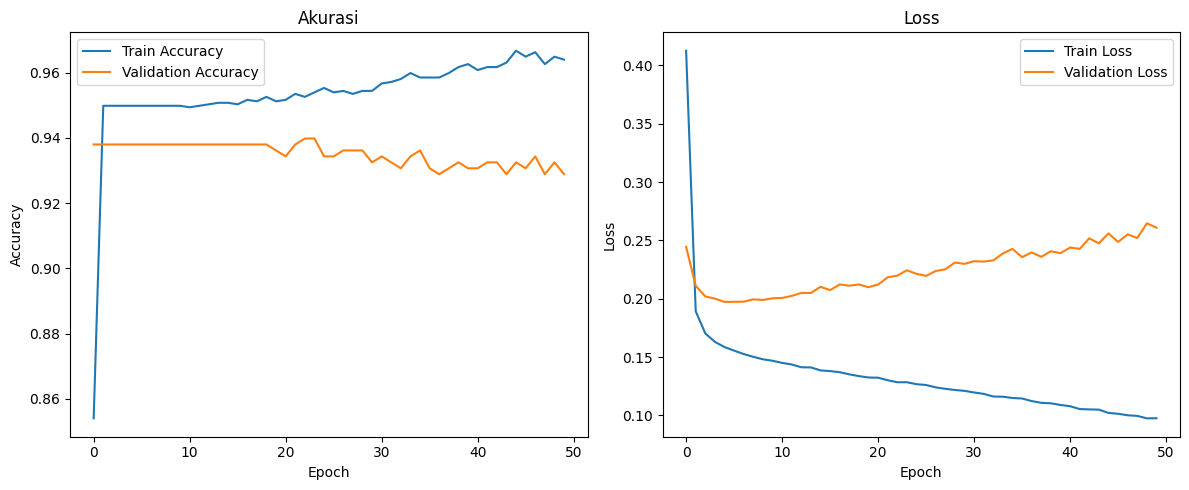

In [29]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()